In [30]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("scalarData.csv")
df['topo'] = df['topo'].apply(lambda x: x.replace("'", ""))
df['topo'] = df['topo'].apply(lambda x: x.replace("[", ""))
df['topo'] = df['topo'].apply(lambda x: x.replace("]", ""))
df

,Unnamed: 0,mA0,mHc,mH0,deltaM,dA0,dHc,rmax,ana,topo,bestTx
0,0,217.1472,187.2053,187.0657,0.1396,2.559818e-12,24.822529,17.358470,ATLAS-SUSY-2016-32,THSCPM1b,THSCPM1b
1,1,314.4089,299.9726,299.8332,0.1394,9.093751e-11,25.025593,3.906569,ATLAS-SUSY-2016-32,THSCPM1b,THSCPM1b
2,2,215.3913,161.1239,160.9843,0.1396,1.279409e-13,6.400029,4.230742,CMS-EXO-13-006,"THSCPM1b, THSCPM2b, THSCPM9",THSCPM2b
3,3,582.8513,441.9378,441.7987,0.1391,2.587924e-17,25.249425,1.420405,CMS-EXO-13-006,"THSCPM1b, THSCPM2b, THSCPM3, THSCPM4",THSCPM2b
4,4,407.3220,378.8460,378.4708,0.3752,2.935479e-12,0.011087,0.001664,ATLAS-SUSY-2016-06,"TDTM1S, TDTM2S",TDTM1S
...,...,...,...,...,...,...,...,...,...,...,...
26015,26015,421.6375,316.9555,316.8084,0.1471,1.557226e-16,0.538133,0.238986,ATLAS-SUSY-2016-06,"TDTM1S, TDTM2S",TDTM1S
26016,26016,696.6978,549.2016,549.1148,0.0868,1.992807e-17,276.138444,0.977097,ATLAS-SUSY-2016-32,THSCPM1b,THSCPM1b
26017,26017,571.6808,495.5409,495.4004,0.1405,1.090344e-14,1.799834,0.021893,ATLAS-SUSY-2016-06,"TDTM1S, TDTM2S",TDTM1S
26018,26018,460.6198,372.8891,372.7494,0.1397,1.113951e-15,4.913629,0.779602,CMS-EXO-13-006,"THSCPM1b, THSCPM2b, THSCPM3, THSCPM4",THSCPM2b


In [31]:
excl = df[df['rmax'] > 1]
ald = df[~(df['rmax'] > 1)]
near = df[(0.5 < df['rmax']) & (df['rmax'] < 1.)]
dt = excl[excl.topo.str.contains('DT')]
hscp = excl[excl.topo.str.contains('HSCP')]
analyses = excl.ana.unique()
topos = excl.bestTx.unique()
analyses

array(['ATLAS-SUSY-2016-32', 'CMS-EXO-13-006', 'ATLAS-SUSY-2016-06'],
      dtype=object)

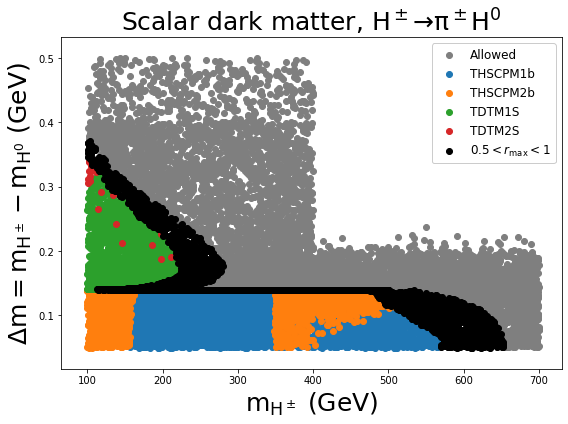

In [32]:
plt.figure(figsize=(8,6))
plt.scatter(ald['mHc'], ald['deltaM'], color='tab:grey', label="Allowed")
# plt.scatter(excl['deltaM'], excl['mHc'])
for topo in topos:
    toplot = excl[excl['bestTx']==topo]
    label = topo
    plt.scatter(toplot['mHc'], toplot['deltaM'], label=label)
plt.scatter(near['mHc'], near['deltaM'], color='black', label=r"$0.5<r_{\rm{max}}<1$")


lgd = plt.legend(loc='upper right', framealpha=1.,fontsize=12)

# plt.ylim(0,700)
# plt.xlim(0,800)
plt.title(r"Scalar dark matter, $\mathregular{H^\pm \to \pi^\pm H^0}$",fontsize = 25)
plt.ylabel(r'$\mathregular{\Delta m = m_{H^\pm} - m_{H^0}}$ (GeV)',fontsize = 25)
plt.xlabel(r'$\mathregular{m_{H^\pm}}$ (GeV)',fontsize = 25)
plt.tight_layout()
plt.show()

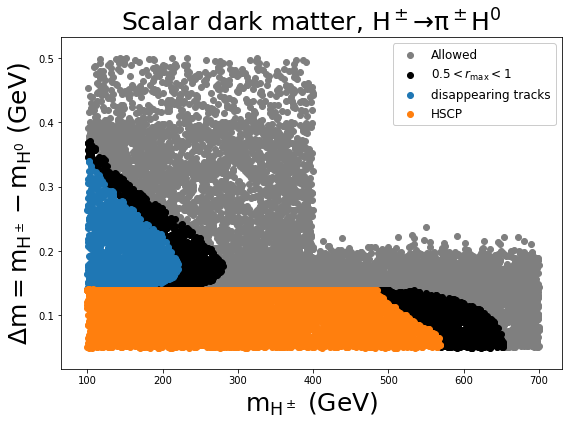

In [44]:
plt.figure(figsize=(8,6))
plt.scatter(ald['mHc'], ald['deltaM'], color='tab:grey', label="Allowed")
plt.scatter(near['mHc'], near['deltaM'], color='black', label=r"$0.5<r_{\rm{max}}<1$")
plt.scatter(dt['mHc'], dt['deltaM'], label = 'disappearing tracks')
plt.scatter(hscp['mHc'], hscp['deltaM'], label = 'HSCP')


lgd = plt.legend(loc='upper right', framealpha=1.,fontsize=12)

# plt.ylim(0,700)
# plt.xlim(0,800)
plt.title(r"Scalar dark matter, $\mathregular{H^\pm \to \pi^\pm H^0}$",fontsize = 25)
plt.ylabel(r'$\mathregular{\Delta m = m_{H^\pm} - m_{H^0}}$ (GeV)',fontsize = 25)
plt.xlabel(r'$\mathregular{m_{H^\pm}}$ (GeV)',fontsize = 25)
plt.tight_layout()
plt.show()

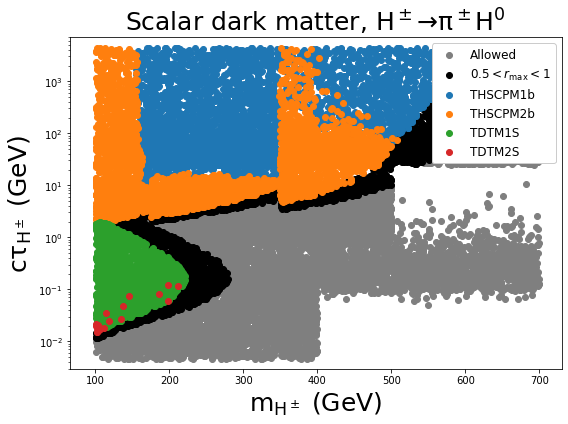

In [43]:
plt.figure(figsize=(8,6))
plt.scatter(ald['mHc'], ald['dHc'], color='tab:grey', label="Allowed")
plt.scatter(near['mHc'], near['dHc'], color='black', label=r"$0.5<r_{\rm{max}}<1$")
for topo in topos:
    toplot = excl[excl['bestTx']==topo]
    label = topo
    plt.scatter(toplot['mHc'], toplot['dHc'], label=label)


lgd = plt.legend(loc='upper right', framealpha=1.,fontsize=12)

plt.ylim(3E-3,7E3)
# plt.xlim(0,800)
plt.yscale('log')
plt.title(r"Scalar dark matter, $\mathregular{H^\pm \to \pi^\pm H^0}$",fontsize = 25)
plt.ylabel(r'$\mathregular{c\tau_{H^\pm}}$ (GeV)',fontsize = 25)
plt.xlabel(r'$\mathregular{m_{H^\pm}}$ (GeV)',fontsize = 25)
plt.tight_layout()
plt.show()

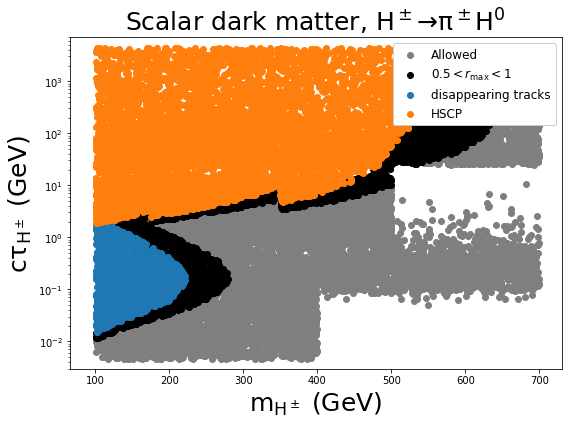

In [39]:
plt.figure(figsize=(8,6))
plt.scatter(ald['mHc'], ald['dHc'], color='tab:grey', label="Allowed")
plt.scatter(near['mHc'], near['dHc'], color='black', label=r"$0.5<r_{\rm{max}}<1$")
plt.scatter(dt['mHc'], dt['dHc'], label="disappearing tracks")
plt.scatter(hscp['mHc'], hscp['dHc'], label="HSCP")


lgd = plt.legend(loc='upper right', framealpha=1.,fontsize=12)

plt.ylim(3E-3,7E3)
# plt.xlim(0,800)
plt.yscale('log')
plt.title(r"Scalar dark matter, $\mathregular{H^\pm \to \pi^\pm H^0}$",fontsize = 25)
plt.ylabel(r'$\mathregular{c\tau_{H^\pm}}$ (GeV)',fontsize = 25)
plt.xlabel(r'$\mathregular{m_{H^\pm}}$ (GeV)',fontsize = 25)
plt.tight_layout()
plt.show()

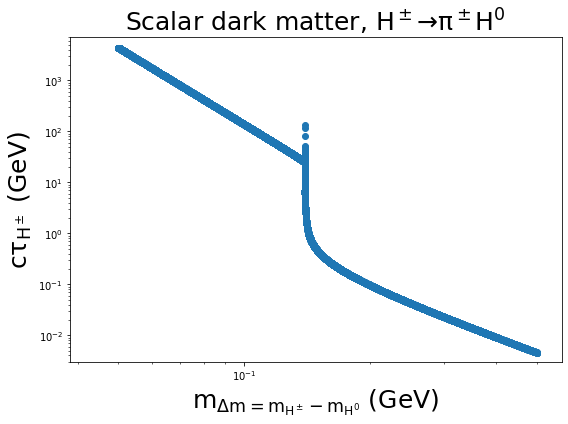

In [42]:
plt.figure(figsize=(8,6))
plt.scatter(df['deltaM'], df['dHc'])



# lgd = plt.legend(loc='upper right', framealpha=1.,fontsize=12)

plt.ylim(3E-3,7E3)
# plt.xlim(0,800)
plt.yscale('log')
plt.xscale('log')
plt.title(r"Scalar dark matter, $\mathregular{H^\pm \to \pi^\pm H^0}$",fontsize = 25)
plt.ylabel(r'$\mathregular{c\tau_{H^\pm}}$ (GeV)',fontsize = 25)
plt.xlabel(r'$\mathregular{m_{\Delta m = m_{H^\pm} - m_{H^0}}}$ (GeV)',fontsize = 25)
plt.tight_layout()
plt.show()